<div style="float:left">
    <h1 style="width:600px">Workshop 8: Dimensionality Reduction</h1>
    <h3 style="width:600px">CASA0006: Data Science for Spatial Systems</h3>
    <h3 style="width:600px">Author: Huanfa Chen</h3>
</div>
<div style="float:right"><img width="100" src="https://github.com/jreades/i2p/raw/master/img/casa_logo.jpg" /></div>

In [1]:
import datetime
now = datetime.datetime.now()
print("Last executed: " + now.strftime("%Y-%m-%d %H:%M:%S"))

Last executed: 2025-03-11 09:58:21


In this week's workshop, we will be revisiting the Boston house price dataset to see how we can use dimensionality reduction techniques to derive deeper understanding of the data.

While we won't expect you to learn about every element of the data mining process, the intention is that you will be able to select and execute (using `sklearn`) an appropriate methodology for the in-depth analysis of your data. 

This workshop will cover the use of **Principal Component Analysis (PCA)**, **kernel PCA**, and **Locally Linear Embedding**, provided by `sklearn` library.

Let's first import the basic libraries we will need. `Pandas` for data import and handling, `matplotlib` for graphing non-Pandas arrays, and `Numpy` for maths tools. **Run the script below to get started.**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from time import time

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [3]:
# If the scipy version is 1.11.0 or higher, the code will not work due to a TypeError relating to sym_pos keyword
# If so, please install scipy 1.10.1 using the command below
# !pip install scipy==1.10.1

# Data Exploration

This dataset relates to house prices in the 506 census tracts in Boston, USA. This dataset was put together by researchers at Carnegie Mellon University in the late 1970s to investigate the relationship between house prices and air pollution. There are 13 continuous variables in the dataset and 1 binary-valued attribute (the **CHAS** attribute). According to the  [metadata](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html), the definition of these variables is as below.

Some discussion of this dataset can be found in:

- [Revisiting the Boston data set](https://openjournals.wu.ac.at/region/paper_107/107.html)
- [racist data destruction?](https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8)

Note that we will remove the variable of `B`, as it is not ethical.

Note that the variable of `MEDV` is excluded in the dimensionality reduction process, as it would be used as the dependent variable in the regression and for the hyperparameter tuning.

| Variable      | Meaning          |
| ------------- | ------------- |
| CRIM| per capta crime rate by town.
| ZN| proportion of residential land zoned for lots over 25,000 sq.ft.
| INDUS| proportion of non-retail business acres per town
| CHAS| Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
| NOX| nitric oxides concentration (parts per 10 million)
| RM| average number of rooms per dwelling
| AGE| proportion of owner-occupied units built prior to 1940
| DIS| weighted distances to five Boston employment centres
| RAD| index of accessibility to radial highways
| TAX| full-value property-tax rate per \$10,000
| PTRATIO| pupil-teacher ratio by town
| B| 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
| LSTAT| % lower status of the population
| MEDV| Median value of owner-occupied home in $1000's.

**In this workshop, we try to answer the following questions**:

1. What is the result of using PCA on these variables?
1. Can PCA improve the linear regression model?
1. What are the implications of Kernel PCA and LLE on this dataset?

**Based on what you know from using Pandas over the last few weeks, import the Boston housing dataset on Github as a Pandas dataframe (call it `boston`), inspect the data, calculate summary statistics on all attributes, and general simple plots of pairs of attributes.**

In [4]:
boston = pd.read_csv('https://raw.githubusercontent.com/huanfachen/Spatial_Data_Science/main/Dataset/boston_housing.csv')

In [5]:
boston = boston.drop(['B'], axis=1)

In [6]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [7]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000
mean,3.6135,11.3636,11.1368,0.0692,0.5547,6.2846,68.5749,3.7950,9.5494,408.2372,18.4555,12.6531,22.5328
std,8.6015,23.3225,6.8604,0.2540,0.1159,0.7026,28.1489,2.1057,8.7073,168.5371,2.1649,7.1411,9.1971
min,0.0063,0.0000,0.4600,0.0000,0.3850,3.5610,2.9000,1.1296,1.0000,187.0000,12.6000,1.7300,5.0000
25%,0.0820,0.0000,5.1900,0.0000,0.4490,5.8855,45.0250,2.1002,4.0000,279.0000,17.4000,6.9500,17.0250
50%,0.2565,0.0000,9.6900,0.0000,0.5380,6.2085,77.5000,3.2074,5.0000,330.0000,19.0500,11.3600,21.2000
75%,3.6771,12.5000,18.1000,0.0000,0.6240,6.6235,94.0750,5.1884,24.0000,666.0000,20.2000,16.9550,25.0000
max,88.9762,100.0000,27.7400,1.0000,0.8710,8.7800,100.0000,12.1265,24.0000,711.0000,22.0000,37.9700,50.0000


# DR Methods

## PCA

PCA is a workhorse dimensionality reduction method, which is simple, fast, and effective. It can be thought of as freely rotating axes to align with directions of maximum variance. This is a nice summary of PCA:

> PCA (Principal Components Analysis) gives us our ideal set of features. It creates a set of principal components that are **rank ordered by variance** (the first component has higher variance than the second, the second has higher variance than the third, and so on), **uncorrelated** (all components are orthogonal), and **low in number** (we can throw away the lower ranked components as they contain little signal).

I also strongly recommend [this exposition](https://towardsdatascience.com/understanding-pca-fae3e243731d) in Towards Data Science.

In this part, we will use the PCA for the given variables excluding the **MEDV** variable. The documentation of PCA in the ```sklearn``` package is [here ](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

In [8]:
# separate the independent and dependent variables
X = boston.drop('MEDV', axis=1).values

# the name list of independent variables
list_var_X = boston.columns.tolist()
list_var_X.remove('MEDV')

y = boston.loc[:,['MEDV']].values

In [9]:
# standardisation of the X. This is essential for PCA.
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [10]:
from sklearn.decomposition import PCA
rand_st_int = 10 
pca = PCA(random_state=rand_st_int)
# fit the components
X_new_components = pca.fit_transform(X)

Note that two objects have been created, ```pca``` and ```X_new_components```. ```pca``` stores a list of relevant information about the PCA transformation, while ```X_new_components``` is a DataFrame that stores the new coordinates under the new components for each data point. Each row of ```X_new_components``` refers to a data instance that corresponds to a row of ```X```, and each column of ```X_new_components``` represents a new component.

Each principal component is a linear combination (or a weighted sum) of the original dimensions. This information is stored in the **components_** variable as part of the **pca** object.

In the **components_**, each row corresponds to a principal component, and each column represents an original dimension. The values of each row specifies the weights of the original dimensions to form this PC. The rows are sorted by **explain_variance_** in the descending order. Therefore, the first row corresponds to the first PC.

**Can you identify which original variables are more important than the others for the first component?**

In [11]:
df_PrincipleComp = pd.DataFrame(pca.components_, columns = list_var_X) # the list_var_X is used as the column names
df_PrincipleComp

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.2513,-0.2664,0.3549,0.0076,0.3499,-0.1964,0.3232,-0.3309,0.3222,0.3423,0.2109,0.3153
1,-0.2736,-0.2501,0.0931,0.5029,0.2325,0.2730,0.2930,-0.3426,-0.2309,-0.2130,-0.3926,-0.1281
2,0.3514,0.3593,-0.0149,0.2014,0.0784,0.5614,-0.0755,0.0133,0.4077,0.3313,-0.1837,-0.2640
3,0.0598,0.1942,0.0107,0.8112,-0.0899,-0.4016,-0.1630,0.2345,0.0457,0.0399,0.1087,0.1848
4,-0.1917,-0.4019,-0.0117,0.1973,-0.2155,0.2851,-0.0763,-0.0296,0.1188,0.0375,0.7020,-0.3462
5,0.7605,-0.2948,-0.3453,0.0832,-0.2079,0.0686,0.1089,-0.1000,-0.1490,-0.3293,0.0128,0.0895
6,-0.1550,0.4014,-0.1742,0.0251,-0.0804,0.3273,0.5999,0.1224,-0.0808,-0.0834,0.3181,0.4251
7,0.2715,0.3742,0.6334,-0.0173,-0.0140,0.0283,-0.0447,-0.1623,-0.4624,-0.1679,0.2550,-0.2199
8,-0.0279,-0.2591,0.3735,0.0118,-0.2032,0.4405,-0.3915,0.1660,-0.0566,0.0021,-0.1257,0.5977
9,0.1092,-0.2678,0.3134,-0.0146,-0.1362,-0.0455,0.4557,0.6901,-0.0303,0.1145,-0.1855,-0.2549


An alternative way to check the weights is to use the biplot (based on this [tutorial](https://www.reneshbedre.com/blog/principal-component-analysis.html)).

In [12]:
# install this library if it is not installed
import sys
if 'bioinfokit' not in sys.modules:
    !pip3 install bioinfokit

  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.4-py3-none-any.whl size=59221 sha256=0fa2d97074f619f123c6ec71706ba9e56007fe78d8462ec8cec7379dc52ede97
  Stored in directory: /home/jovyan/.cache/pip/wheels/83/cd/9c/8605a43f2310bfb74df791d943a9b3aef65377ed484de98bdc
  Created wheel for matplotlib-venn: filename=matplotlib_venn-1.1.2-py3-none-any.whl size=45355 sha256=20ffa7c376507c3d25de21cf2f52005e406dd8b2973b381cb9fdbf4fba6d3fa7
  Stored in directory: /home/jovyan/.cache/pip/wheels/c4/16/4a/93374cd955bbe0553a8ce74db7f0fbd5fcc876e19fb78bd601
Successfully built bioinfokit matplotlib-venn


In [13]:
from bioinfokit.visuz import cluster

cluster.biplot(cscore=X_new_components, loadings=pca.components_, 
               labels=df_PrincipleComp.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
               var2=round(pca.explained_variance_ratio_[1]*100, 2))

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


The above code cell will save a local image file called *biplot_2d.png*. You can load it as follows:

![11](biplot_2d.png)

In this plot, the x and y axis represents the first and second PC, respectively. Each original dimension is repsented by the end point of the line, and the x and y coordinates of each line represent the weights of this dimension for the first and second PC, respetively. 

For example, the weight of **INDUS** for the PC1 is 0.3549, and the variables of ZN, DIS, and RM have negative weights for PC1.

As below, you can see the proportion of variance explained by each component.

In [14]:
print('Explained variance ratio of each component:')
print(pca.explained_variance_ratio_)

Explained variance ratio of each component:
[0.49225715 0.11667186 0.09839138 0.07120348 0.0668624  0.044682
 0.0330088  0.02316465 0.01876363 0.01551715 0.01418398 0.00529354]


We can get the eigen values of each PC. In the lecture, we discussed that the eigen value of an PC are proportional to variance explained by the PC. However, in the sklearn library, the ```explained_variance_``` function gives the actual eigen values, rather than the actual explained variance.

In [15]:
print('Eigenvalues of each component:')
print(pca.explained_variance_)

Eigenvalues of each component:
[5.91878297 1.40283467 1.18303459 0.85613367 0.80393755 0.53724573
 0.39688996 0.27852625 0.2256094  0.18657447 0.17054479 0.06364832]


One of the use of PCA is to visualise high-dimensional data. Here we can visualise the first two components, using the house price as the colour.

Text(0, 0.5, 'PC2')

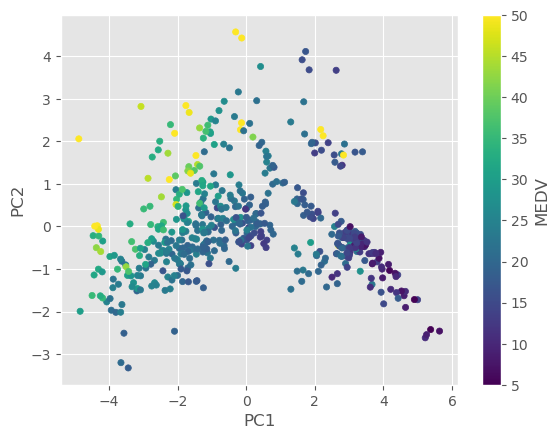

In [16]:
df_X_new_coord = pd.DataFrame(X_new_components)
# adding the MEDV variable to df_X_new_coord
df_X_new_coord = df_X_new_coord.assign(MEDV = boston.MEDV)
ax = df_X_new_coord.plot.scatter(x = 0, y = 1, c = "MEDV", colormap="viridis")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

Q: What information can you get from this plot? Any relationship between house price and PC1 or PC2?

You are free to change the ```colormap``` or the color variable ```c```.

One common application of PCA is to visualise the clustering results. You can find an example [here](https://cmdlinetips.com/2018/03/pca-example-in-python-with-scikit-learn/).

### Selecting the number of components

In the lecture, we talked about three methods to select the number of PCA components.

1. Using two or three dimensions for visualisation;
2. Retaining components with eigenvalues larger than one;
3. Using Scree plot to locate a point that occurs just before the Scree plot flattens out.

Following the Rule 2, we would choose three components from PCA, as they have eigenvalues larger than one.

How about Rule 3? Let's try the Scree plot.

<Axes: xlabel='PC'>

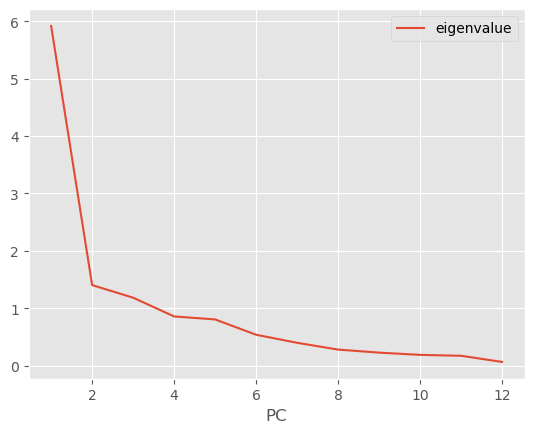

In [17]:
df = pd.DataFrame({'eigenvalue':pca.explained_variance_,
             'PC':list(range(1, pca.n_components_ + 1))})
df.plot.line(x = 'PC', y = 'eigenvalue')

One observation is that ```PC=2``` is a transition point, as the plot decreases very quickly before this point and then becomes very flat after it. Therefore, two components should be chosen.

In practice, you can decide which rule to use.

### Linear Regression

Another use of PCA is that it may improve the performance of data analysis. First, if only a few principal components are used for model training, the required memory and computation time is reduced. Second, as the principal components are linearly independent, they are not subject to the multicollinearity issue. 

To demonstrate this, let us build a multiple linear regression model to predict the house price, and then compare it with another linear regression model using three components in the next part.

#### Step 1: split the data into training and testing set. 

Remember that this is very important to measure the predictive performance of the models.

In [18]:
from sklearn.model_selection import train_test_split
split_rand_state = 1
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=split_rand_state)

#### Step 2: build a linear regression model using the training data

In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X=train_X, y=train_y)

LinearRegression()

#### Step 3: measure model performance using the testing data

We use R2 as the performance metric for linear regression.

In [20]:
lr.score(X=test_X, y=test_y)

0.7668348687111718

### PCA regression

We will try to build another linear regression model using the principal components. This method is called **Principle Component Regression** (denoted by PCR). See [this post](https://blogs.sas.com/content/iml/2017/10/25/principal-component-regression-drawbacks.html) for the pros and cons of this method. 

One of the main advantages of using PCR is that the principal components are linearly independent, so there is no issues of multicollinearity.

In this part, we will use the first three principal components in the regression.

In [21]:
# create a new X dataset including three PCs
X_three_pc = X_new_components[:,[0,1,2]]

In [22]:
# split the traing and testing dataset
split_rand_state = 1
train_X_pc, test_X_pc, train_y_pc, test_y_pc = train_test_split(X_three_pc, y, random_state=split_rand_state)

In [23]:
# train a new model
lr_pc = LinearRegression()
lr_pc.fit(X=train_X_pc, y=train_y_pc)

LinearRegression()

In [24]:
# measure the model performance
lr_pc.score(X=test_X_pc, y=test_y_pc)

0.7041196910286294

The R2 score shows that the performance of the new model is not as good as the previous one. This indicates that PCR does not always lead to a more accurate model. This can be explained by that some information of the dataset is lost when only the three components are used. Another potential reason is that "there is no a priori reason to believe that the principal components with the largest variance are the components that best predict the response", which is discussed in this [post](https://blogs.sas.com/content/iml/2017/10/25/principal-component-regression-drawbacks.html).

## Kernel PCA

We will try using the kernel PCA (kPCA) to reduce the dimension of this dataset.

To use kPCA, we would need to select a kernel function. In this example, we will compare three common kernel functions, as below.

![](https://d3i71xaburhd42.cloudfront.net/3a92a26a66efba1849fa95c900114b9d129467ac/3-TableI-1.png)

[Image Credit](https://d3i71xaburhd42.cloudfront.net/3a92a26a66efba1849fa95c900114b9d129467ac/3-TableI-1.png)

In [25]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X) 

In [26]:
# different kernels can be used
lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.05, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.05, coef0=1, fit_inverse_transform=True)

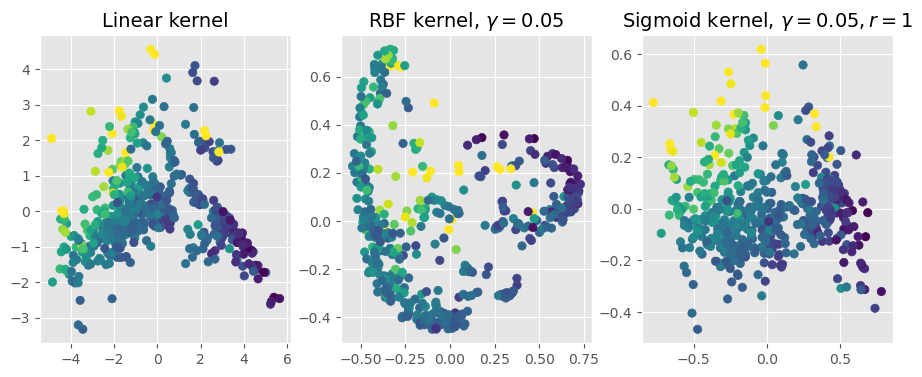

In [27]:
 #loop over methods and plot the projection of the Swiss-roll-shaped data
plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), 
                            (132, rbf_pca, "RBF kernel, $\gamma=0.05$"), 
                            (133, sig_pca, "Sigmoid kernel, $\gamma=0.05, r=1$")):
    X_reduced = pca.fit_transform(X)
    
    plt.subplot(subplot), plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=boston.MEDV, cmap="viridis")

The scatter plots are coloured by the house price.

Note that the new dimensions above are not a linear combination of the original features. Therefore, we can't interpret the meaning of the new dimensions.

To interpret these plots, you can check the following questions:

- Are the areas of similar median house price clustered?
- Are the high-price and low-price areas separable in the new 2-D space?

The Kernel PCA above has several key hyperparameters: the kernel type and the settings associated with the kernel function, such as the gamma of rbf kernel.

The hyperparamters might influence the performance of dimension reduction.

We can tune these hyperparameters using the performance of a logistic regression and the 'MEDV' variable. The idea is: A 'good' new 2D space is likely to separate high-price and low-price areas. Therefore, we will construct a logit regression model to classify the areas over and below the average median-house-price in the new space. The hyperparameter combination that leads to the best classification performance of areas is the optimal setting for this kernel PCA.

In [28]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# create a new y variable: 1 indicates above median price and 0 indicates otherwise
y = boston.MEDV > np.mean(boston.MEDV)

# a pipeline is a way of concatenating many analysis steps. Will introduce the Pipeline in later workshops.
clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression())
    ])

# two hyperparamters will be tuned: kernel type, and the gamma of the kernel
param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.1, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)
print(grid_search.best_params_)

{'kpca__gamma': 0.1, 'kpca__kernel': 'sigmoid'}


Now, you can use the optimal hyperparameters to rerun the kernel PCA.

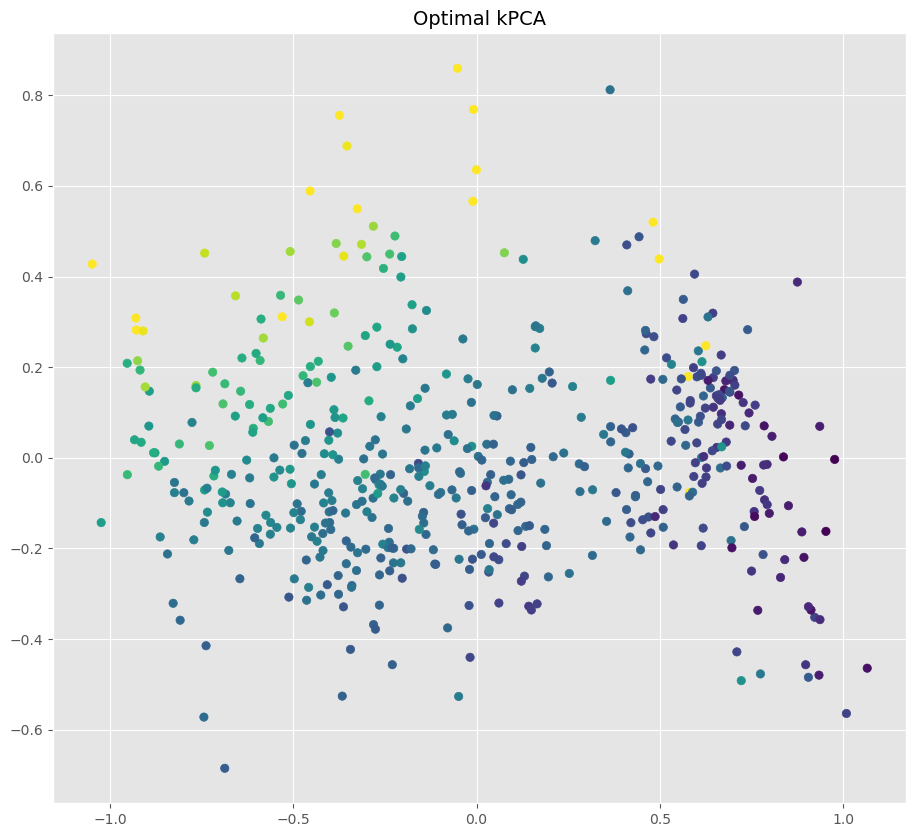

In [29]:
k_pca_opt = KernelPCA(n_components = 2, kernel=grid_search.best_params_['kpca__kernel'], 
                      gamma=grid_search.best_params_['kpca__gamma'], fit_inverse_transform=True)

plt.figure(figsize=(11, 10))
X_reduced = k_pca_opt.fit_transform(X)  
plt.title('Optimal kPCA', fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=boston.MEDV, cmap="viridis")

## LLE

We will then use LLE to obtain the low-dimensional space. Like kPCA, LLE is a non-linear DR algorithm.

In [30]:
from sklearn.manifold import LocallyLinearEmbedding

In [31]:
# one example of LLE
random_state_lle = 1000
lle = LocallyLinearEmbedding(
    n_neighbors=20, #k nearest neighbours 
    n_components=2, #dimension of final space 
    random_state=random_state_lle)

X_reduced = lle.fit_transform(X)

neighbours=5 in 0.043 sec
neighbours=10 in 0.044 sec
neighbours=20 in 0.052 sec
neighbours=50 in 0.078 sec


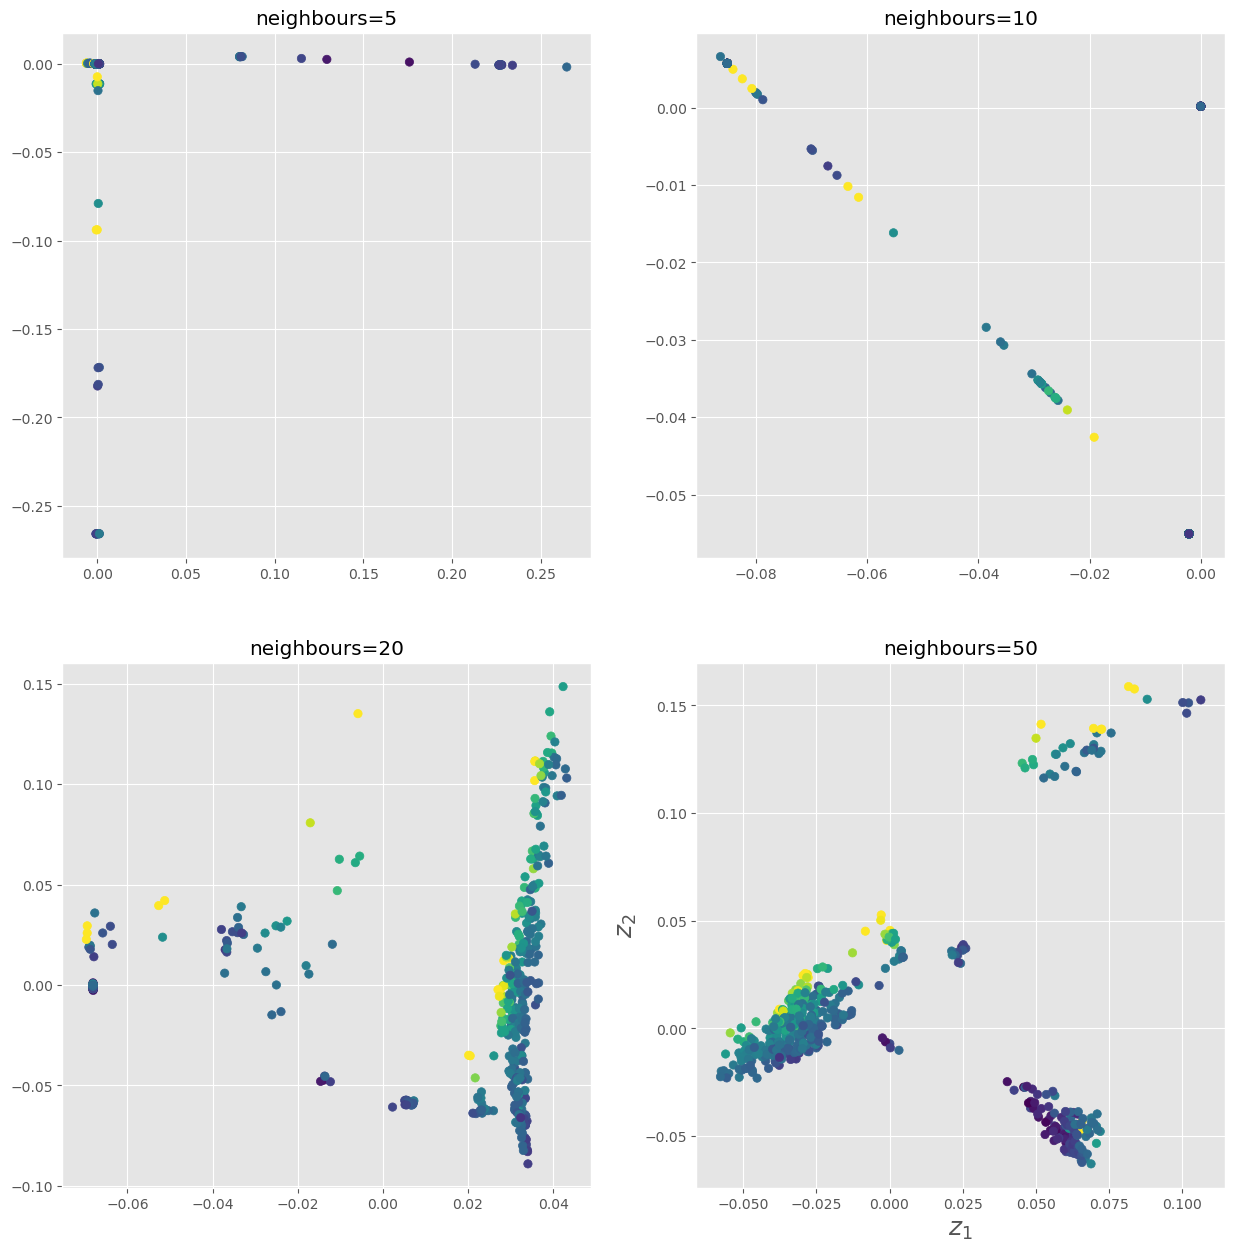

In [32]:
# run and compare a range of LLE with different n_neighbors
n_components = 2
(fig, subplots) = plt.subplots(2, 2, figsize=(15, 15), squeeze=False)
n_neighbors = [5, 10, 20, 50]
plt.axis('tight')
subplots = subplots.flatten()

random_state_lle = 1024 

for i, nneighor in enumerate(n_neighbors):
    ax = subplots[i]

    t0 = time()
    lle = LocallyLinearEmbedding(
        n_neighbors=nneighor, #k nearest neighbours 
        n_components=n_components, #dimension of final space 
        random_state=random_state_lle)
    X_reduced = lle.fit_transform(X)
    t1 = time()
    print("neighbours=%d in %.2g sec" % (nneighor, t1 - t0))
    ax.set_title("neighbours=%d" % nneighor)
    ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c = boston.MEDV, cmap="viridis")
    plt.xlabel("$z_1$", fontsize=18)
    plt.ylabel("$z_2$", fontsize=18)
    ax.axis('tight')

So, what patterns can you identify from these plots?

Note the overlaps of points - severe overlaps indicate unfavourable results.

LLE has a hyperparameter, **n_neighbors**. This hyperparamter can be tuned in a similar way as the kernel function of kernel PCA.

Can you write some code to tune the **n_neighbors** of LLE?

# Conclusion

In this workshop, we have practiced PCA, kernel PCA, and LLE on the Boston housing data. 

You can use these methods on your own dataset, especially when the data have a high dimension and are difficult to understand and analyse.

If you are interested, you can learn other methods for dimensionality reduction, such as t-SNE and UMAP. The resources below would be useful.

# Resources

- Rethinking 'distance' in New York City *Medium* [URL](https://medium.com/topos-ai/rethinking-distance-in-new-york-city-d17212d24919)
- Five Boroughs for the 21st Century *Medium* [URL](https://medium.com/topos-ai/five-boroughs-for-the-21st-century-8da941f53618)
- [Curse of Dimensionality on Wikipedia](https://en.wikipedia.org/wiki/Curse_of_dimensionality)
- [The Curse of Dimensionality](https://towardsdatascience.com/the-curse-of-dimensionality-50dc6e49aa1e)
- [Importance of Feature Scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html)
- [Understanding PCA](https://towardsdatascience.com/understanding-pca-fae3e243731d)
- [Introduction to t-SNE in Python](https://www.datacamp.com/community/tutorials/introduction-t-sne)
- [Visualising Data Using Embeddings - a lecture on t-SNE](https://www.youtube.com/watch?v=EMD106bB2vY) (Video)
- [StatQuest: t-SNE, Clearly Explained](https://www.youtube.com/watch?v=NEaUSP4YerM) (Video)
- [How to Use t-SNE Effectively](https://distill.pub/2016/misread-tsne/)
- [How to tune the Hyperparameters of t-SNE](https://towardsdatascience.com/how-to-tune-hyperparameters-of-tsne-7c0596a18868)
- [Understanding UMAP](https://pair-code.github.io/understanding-umap/) (Compares to t-SNE)
- [How UMAP Works](https://towardsdatascience.com/how-exactly-umap-works-13e3040e1668)
- [3 New Techniques for Data-Dimensionality Reduction in ML](https://thenewstack.io/3-new-techniques-for-data-dimensionality-reduction-in-machine-learning/)
- [UMAP for Dimensionality Reduction](https://www.youtube.com/watch?v=nq6iPZVUxZU) (Video)
- [A Bluffer's Guide to Dimensionality Reduction](https://www.youtube.com/watch?v=9iol3Lk6kyU) (Video)

# Acknowledgements

This workshop is partly based on a [notebook](https://github.com/jreades/i2p/blob/master/lectures/9.3-Dimensionality.md) developed by [Jon Reades](https://github.com/jreades), which is part of the CASA00013 module.